# Credit Risk Probability Model - Exploratory Data Analysis

This notebook contains exploratory analysis of the eCommerce transaction data to develop insights for the credit risk model. The goal is to identify patterns, data quality issues, and form hypotheses to guide feature engineering.

## Task Overview
We need to develop a credit scoring model that utilizes eCommerce behavioral data to assess credit risk for a buy-now-pay-later service. This requires:

1. Defining a proxy variable for credit risk categorization (high/low risk)
2. Selecting predictive features that correlate with default risk
3. Building models to assign risk probability and credit scores


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt

# Set visualization options
plt.style.use('ggplot')
sns.set_palette('viridis')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline


## 1. Loading and Exploring the Data Structure

The data is available from the Xente Challenge on Kaggle. Here we will load the dataset and explore its structure to understand the available features and data types.

**Note:** In a real-world scenario, you would need to download the data from the provided link and place it in the `data/raw` directory. For this notebook, we'll use a placeholder path that you should update with the actual location of your data file.


In [2]:
# Load the data
# Update this path to the location of your data file
data_file = "../data/raw/data.csv"

try:
    # Try to load the data if the file exists
    df = pd.read_csv(data_file)
    print(f"Data loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")
except FileNotFoundError:
    print(f"Data file not found at {data_file}")
    print("Please download the data from the Xente Challenge on Kaggle and place it in the data/raw directory")
    # Create a sample dataframe with the expected columns for demonstration
    df = pd.DataFrame({
        'TransactionId': ['T1001', 'T1002', 'T1003'],
        'BatchId': [1, 1, 2],
        'AccountId': ['A001', 'A002', 'A001'],
        'SubscriptionId': ['S001', 'S002', 'S001'],
        'CustomerId': ['C001', 'C002', 'C001'],
        'CurrencyCode': ['UGX', 'UGX', 'UGX'],
        'CountryCode': [123, 123, 123],
        'ProviderId': ['P001', 'P002', 'P003'],
        'ProductId': ['PROD001', 'PROD002', 'PROD003'],
        'ProductCategory': ['Airtime', 'Utility', 'Airtime'],
        'ChannelId': ['web', 'android', 'web'],
        'Amount': [5000, -2000, 10000],
        'Value': [5000, 2000, 10000],
        'TransactionStartTime': ['2018-10-01 10:10:10', '2018-10-01 11:10:10', '2018-10-02 10:10:10'],
        'PricingStrategy': ['A', 'B', 'A'],
        'FraudResult': [0, 1, 0]
    })


Data loaded successfully with 95662 rows and 16 columns


In [3]:
# Examine the structure of the data
print("Data types for each column:")
print(df.dtypes)
print("\nFirst 5 rows of the dataset:")
df.head()


Data types for each column:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

First 5 rows of the dataset:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.00,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.00,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.00,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.00,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.00,644,2018-11-15T03:34:21Z,2,0


In [4]:
# Basic information about the dataset
print("Dataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  Fraud

## 2. Summary Statistics

Let's calculate summary statistics for the numerical features to understand their central tendencies, dispersion, and shape.


In [5]:
# Summary statistics for numerical variables
print("Summary statistics for numerical variables:")
df.describe().T


Summary statistics for numerical variables:


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.00,256.00,0.00,256.00,256.00,256.00,256.00,256.00
Amount,95662.00,6717.85,123306.80,-1000000.00,-50.00,1000.00,2800.00,9880000.00
Value,95662.00,9900.58,123122.09,2.00,275.00,1000.00,5000.00,9880000.00
PricingStrategy,95662.00,2.26,0.73,0.00,2.00,2.00,2.00,4.00
FraudResult,95662.00,0.00,0.04,0.00,0.00,0.00,0.00,1.00


In [6]:
# Convert transaction time to datetime
if 'TransactionStartTime' in df.columns:
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    # Extract time-based features
    df['TransactionYear'] = df['TransactionStartTime'].dt.year
    df['TransactionMonth'] = df['TransactionStartTime'].dt.month
    df['TransactionDay'] = df['TransactionStartTime'].dt.day
    df['TransactionDayOfWeek'] = df['TransactionStartTime'].dt.dayofweek
    df['TransactionHour'] = df['TransactionStartTime'].dt.hour
    
    print("Added datetime features from TransactionStartTime")


Added datetime features from TransactionStartTime


## 3. Distribution of Numerical Features

Let's visualize the distributions of key numerical features to identify patterns, skewness, and potential outliers.


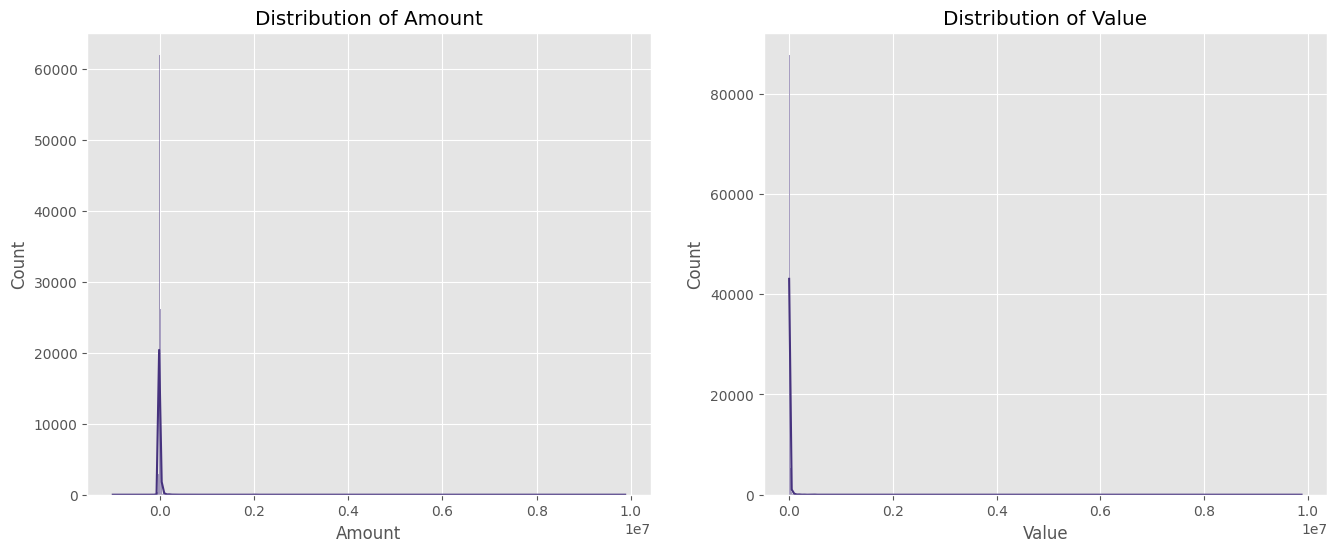

In [9]:
# Plot distributions of Amount and Value
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Amount distribution
if 'Amount' in df.columns:
    sns.histplot(df['Amount'], kde=True, ax=axes[0])
    axes[0].set_title('Distribution of Amount')
    axes[0].set_xlabel('Amount')
    
# Value distribution
if 'Value' in df.columns:
    sns.histplot(df['Value'], kde=True, ax=axes[1])
    axes[1].set_title('Distribution of Value')
    axes[1].set_xlabel('Value')

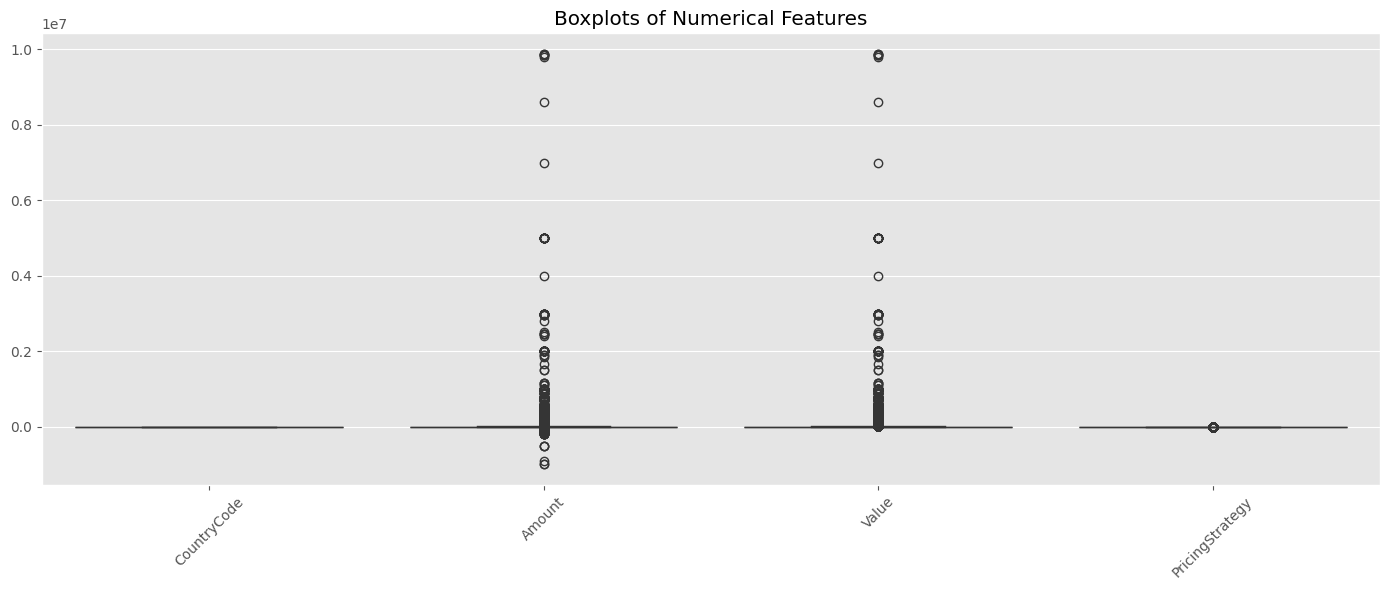

In [10]:
# Box plots for numerical features to identify outliers
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if len(numerical_cols) > 0:
    # Select a subset of numerical columns for boxplot
    plot_cols = [col for col in numerical_cols if col not in ['CustomerId', 'BatchId']][:4]  # Limit to 4 columns
    
    if plot_cols:
        plt.figure(figsize=(14, 6))
        sns.boxplot(data=df[plot_cols])
        plt.title('Boxplots of Numerical Features')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("No numerical columns found for boxplot visualization")


## 4. Distribution of Categorical Features

Let's analyze the distribution of categorical features to understand their frequency and variability.


In [11]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove datetime columns from categorical columns if any
if 'TransactionStartTime' in categorical_cols:
    categorical_cols.remove('TransactionStartTime')

# Print unique values for each categorical column
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Value counts:")
    display(df[col].value_counts().head(10))  # Display top 10 values



Column: TransactionId
Number of unique values: 95662
Value counts:


TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64


Column: BatchId
Number of unique values: 94809
Value counts:


BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
Name: count, dtype: int64


Column: AccountId
Number of unique values: 3633
Value counts:


AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64


Column: SubscriptionId
Number of unique values: 3627
Value counts:


SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
SubscriptionId_1749      465
SubscriptionId_919       411
SubscriptionId_1311      359
SubscriptionId_4722      356
SubscriptionId_652       350
Name: count, dtype: int64


Column: CustomerId
Number of unique values: 3742
Value counts:


CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
CustomerId_3066     612
CustomerId_2528     610
CustomerId_2728     586
CustomerId_3078     573
CustomerId_806      557
Name: count, dtype: int64


Column: CurrencyCode
Number of unique values: 1
Value counts:


CurrencyCode
UGX    95662
Name: count, dtype: int64


Column: ProviderId
Number of unique values: 6
Value counts:


ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64


Column: ProductId
Number of unique values: 23
Value counts:


ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
Name: count, dtype: int64


Column: ProductCategory
Number of unique values: 9
Value counts:


ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64


Column: ChannelId
Number of unique values: 4
Value counts:


ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64

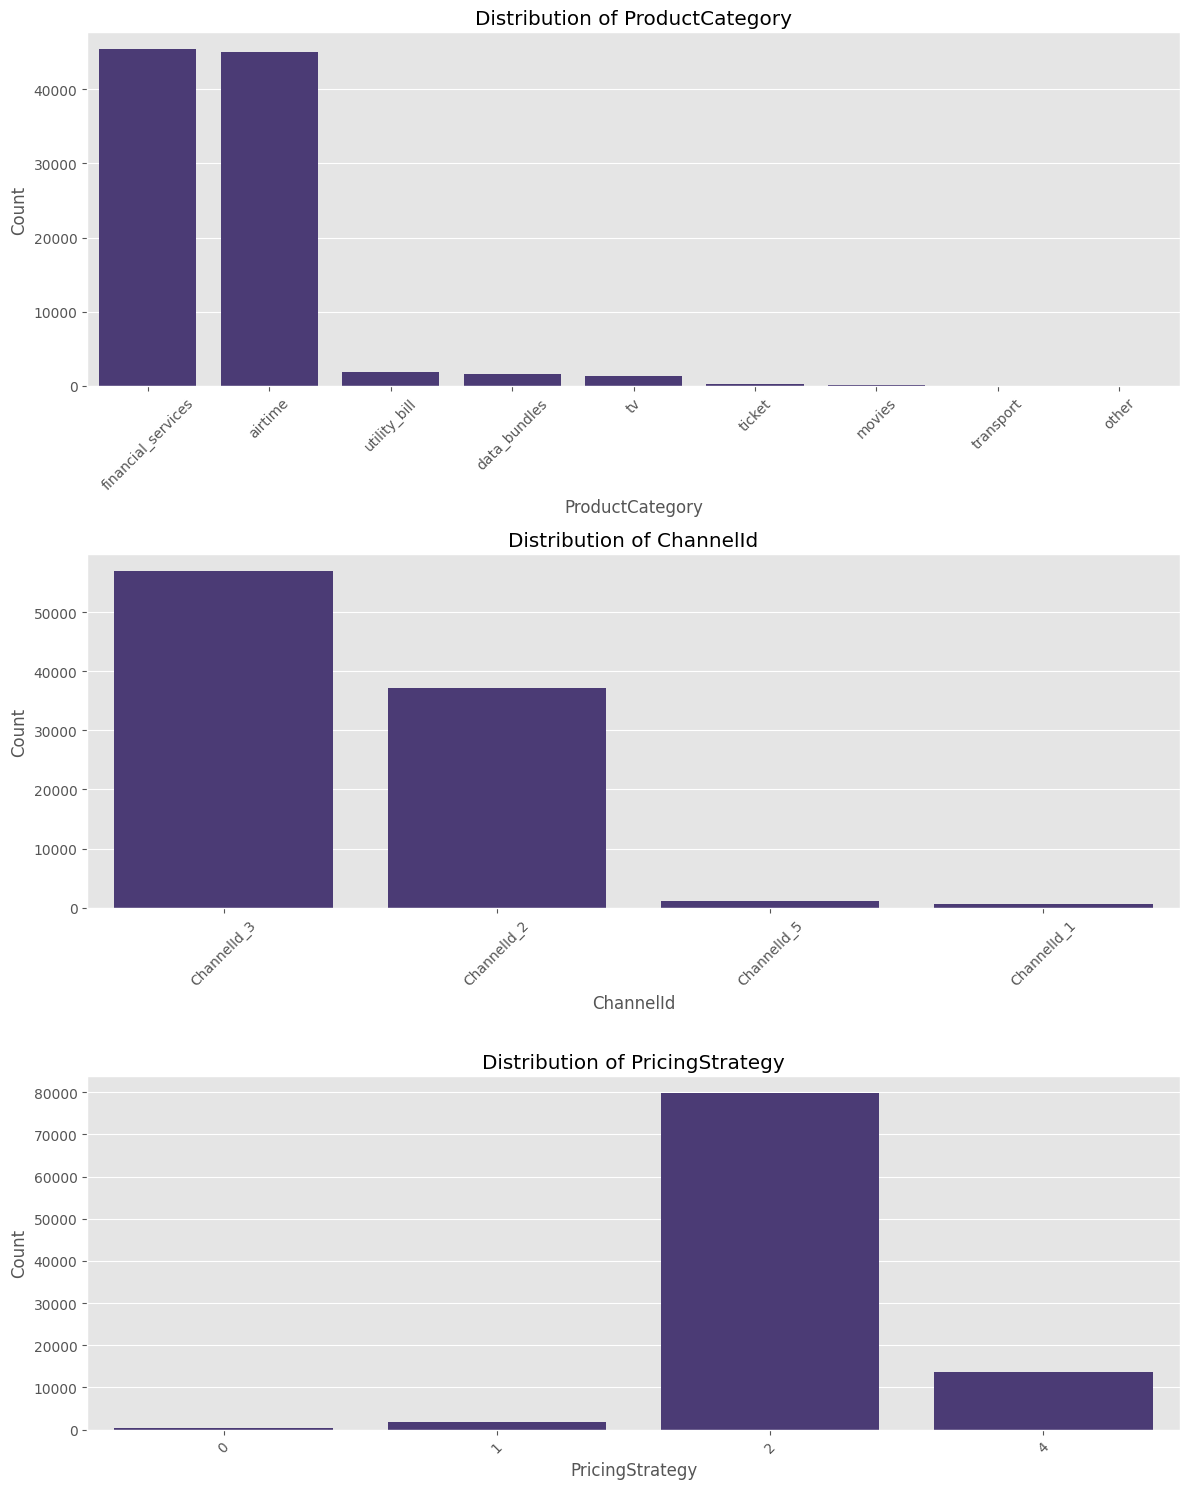

In [12]:
# Visualize distribution of key categorical variables
key_categorical = ['ProductCategory', 'ChannelId', 'PricingStrategy'] 
key_categorical = [col for col in key_categorical if col in df.columns]

if key_categorical:
    fig, axes = plt.subplots(len(key_categorical), 1, figsize=(12, 5*len(key_categorical)))
    
    # Handle case of one categorical variable
    if len(key_categorical) == 1:
        axes = [axes]
        
    for i, col in enumerate(key_categorical):
        value_counts = df[col].value_counts()
        # If there are too many categories, limit to top 10
        if len(value_counts) > 10:
            value_counts = value_counts.nlargest(10)
            
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel(col)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


## 5. Missing Values Analysis

Let's check for missing values in the dataset and decide on appropriate imputation strategies if needed.


In [13]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a dataframe with the results
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentage
})

# Display only columns with missing values
missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Percentage', ascending=False)

if len(missing_info) > 0:
    print("Columns with missing values:")
    display(missing_info)
else:
    print("No missing values found in the dataset!")


No missing values found in the dataset!


## 6. Correlation Analysis

Let's examine the correlation between numerical features to identify potential relationships and dependencies.


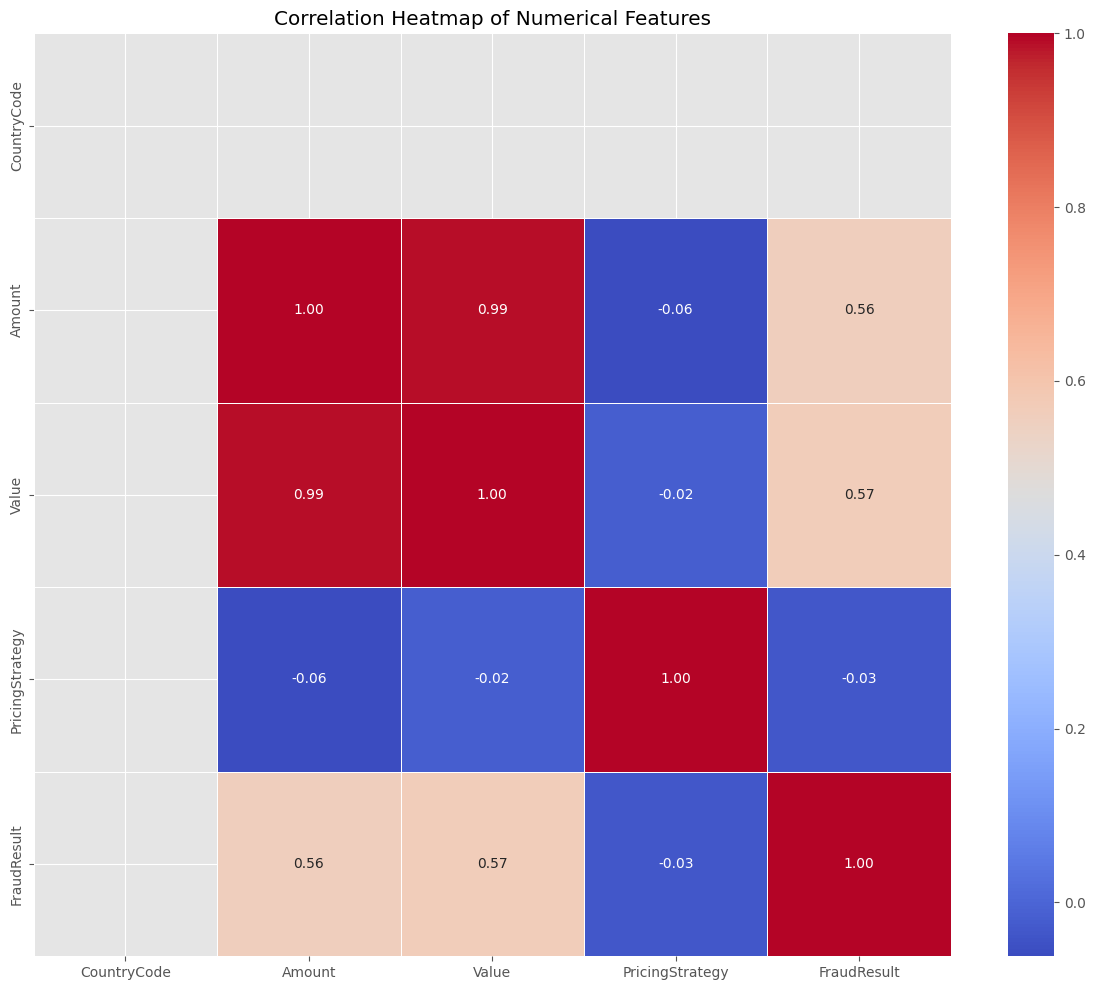

Highly correlated feature pairs (|corr| > 0.7):
Value - Amount: 0.990


In [14]:
# Select numerical features for correlation analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Ensure there are enough numerical variables for meaningful correlation
if len(numerical_cols) >= 2:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # Identify highly correlated pairs (|corr| > 0.7)
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], 
                                      correlation_matrix.iloc[i, j]))
                
    if high_corr_pairs:
        print("Highly correlated feature pairs (|corr| > 0.7):")
        for col1, col2, corr in high_corr_pairs:
            print(f"{col1} - {col2}: {corr:.3f}")
    else:
        print("No highly correlated feature pairs found.")
else:
    print("Not enough numerical columns for correlation analysis")


## 7. FraudResult Analysis

Since FraudResult could be a potential proxy for credit risk, let's analyze its distribution and relationship with other variables.


Distribution of FraudResult:
FraudResult
0    95469
1      193
Name: count, dtype: int64

Percentage distribution:
FraudResult = 0: 99.80%
FraudResult = 1: 0.20%


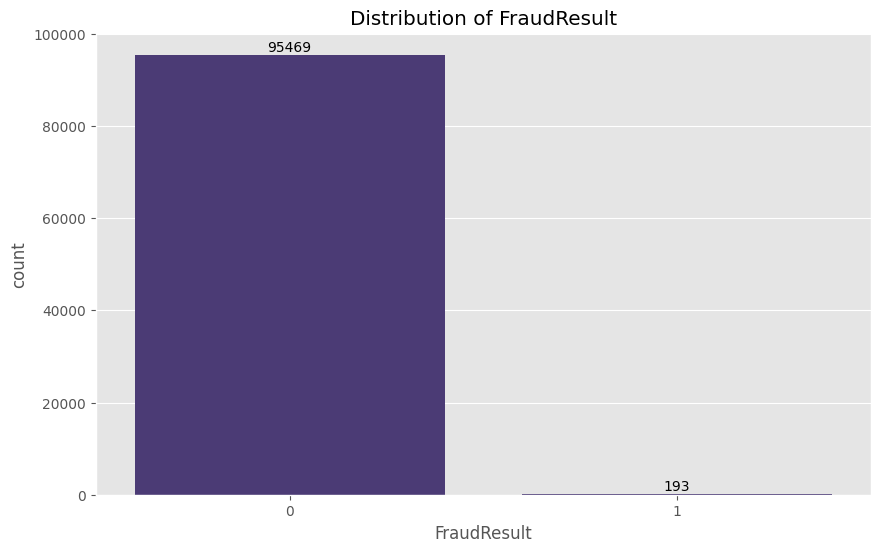

In [15]:
# Check if FraudResult is available in the dataset
if 'FraudResult' in df.columns:
    # Distribution of FraudResult
    print("Distribution of FraudResult:")
    fraud_counts = df['FraudResult'].value_counts()
    print(fraud_counts)
    
    # Calculate percentage of each class
    fraud_percentage = (fraud_counts / len(df)) * 100
    print("\nPercentage distribution:")
    for label, percentage in fraud_percentage.items():
        print(f"FraudResult = {label}: {percentage:.2f}%")
    
    # Visualize FraudResult distribution
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='FraudResult', data=df)
    plt.title('Distribution of FraudResult')
    
    # Add count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'bottom')
    
    plt.show()
else:
    print("FraudResult column not found in the dataset")


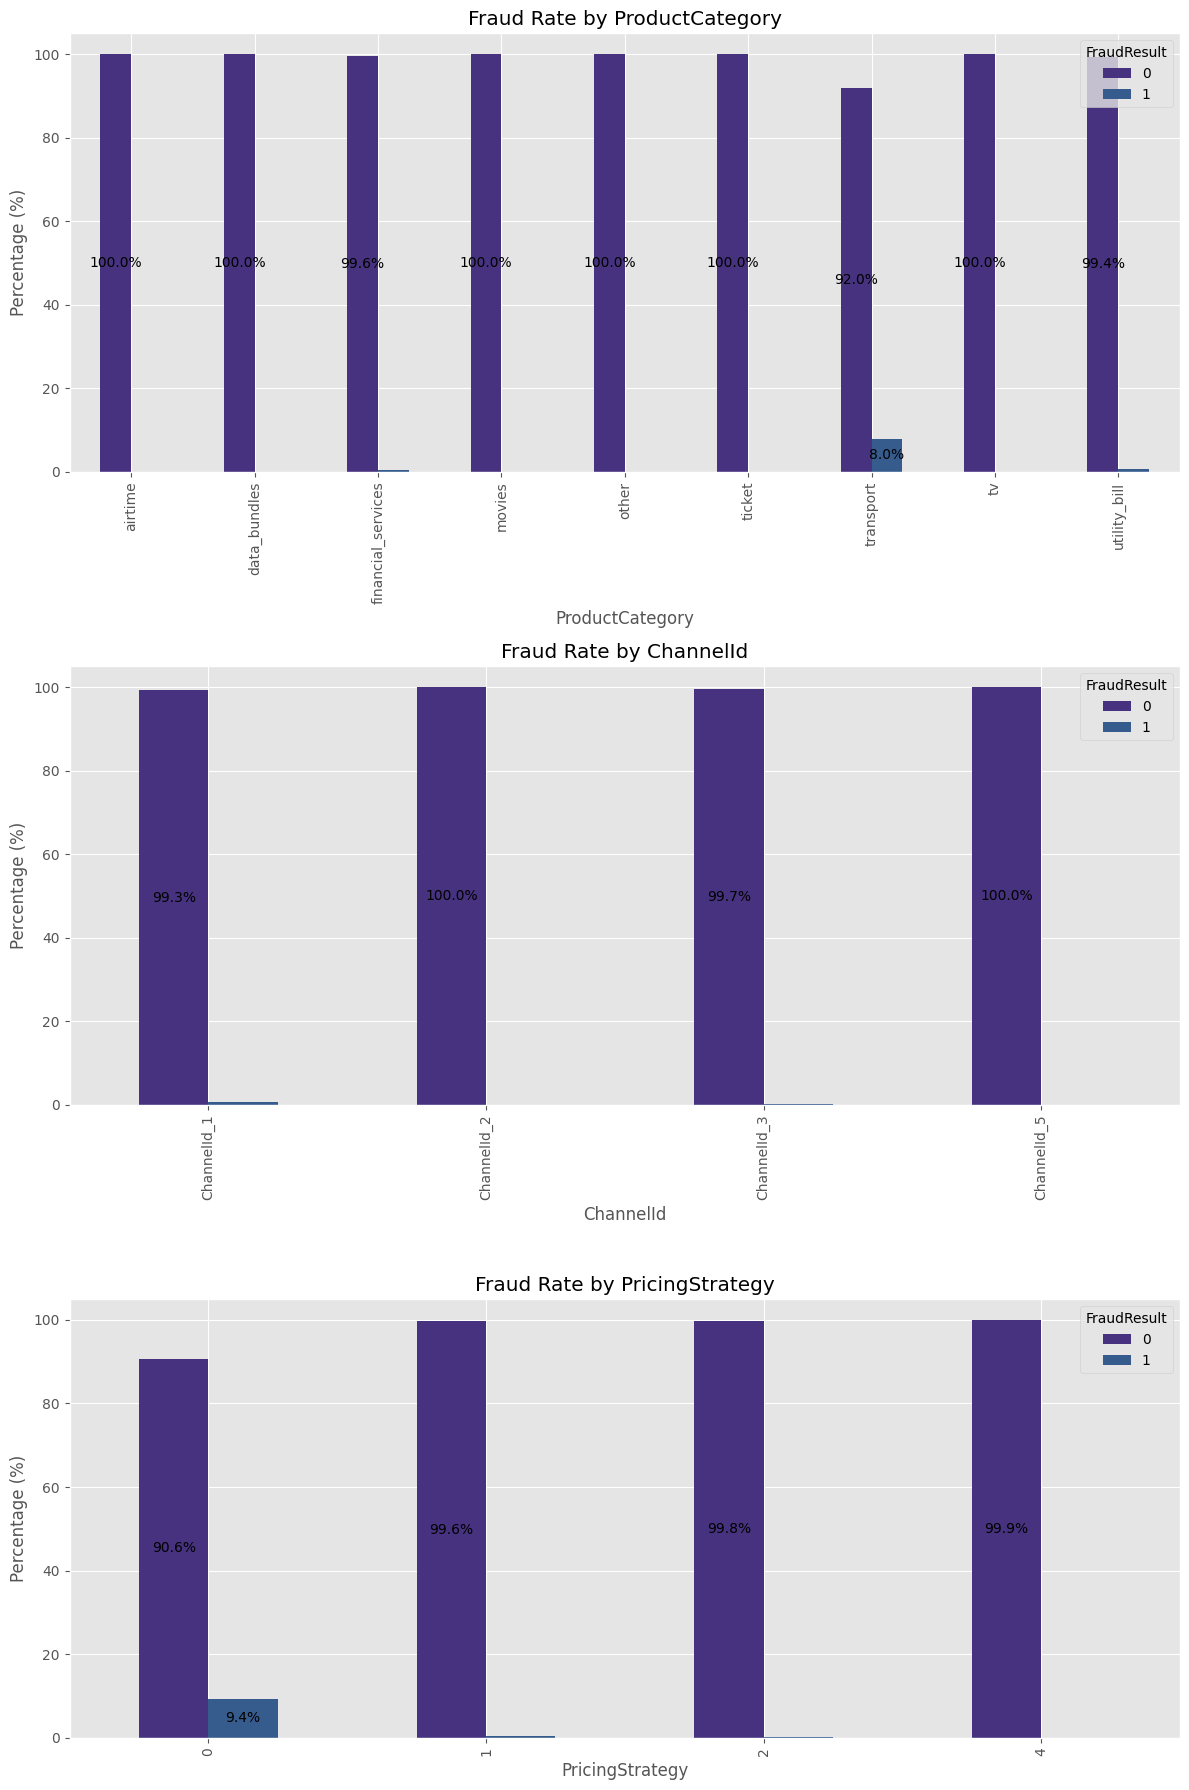

In [16]:
# Analyze FraudResult by key features
if 'FraudResult' in df.columns:
    # Key features to analyze against FraudResult
    key_features = ['ProductCategory', 'ChannelId', 'PricingStrategy']
    key_features = [col for col in key_features if col in df.columns]
    
    if key_features:
        fig, axes = plt.subplots(len(key_features), 1, figsize=(12, 6*len(key_features)))
        
        # Handle case of one feature
        if len(key_features) == 1:
            axes = [axes]
            
        for i, feature in enumerate(key_features):
            fraud_by_feature = pd.crosstab(df[feature], df['FraudResult'], normalize='index') * 100
            fraud_by_feature.plot(kind='bar', ax=axes[i], stacked=False)
            axes[i].set_title(f'Fraud Rate by {feature}')
            axes[i].set_ylabel('Percentage (%)')
            axes[i].set_xlabel(feature)
            axes[i].legend(title='FraudResult')
            
            # Add percentage labels
            for p in axes[i].patches:
                width = p.get_width()
                height = p.get_height()
                x, y = p.get_xy() 
                if height > 5:  # Only add label if segment is large enough
                    axes[i].annotate(f'{height:.1f}%', (x + width/2, y + height/2), 
                                   ha='center', va='center')
        
        plt.tight_layout()
        plt.show()
else:
    print("FraudResult column not found in the dataset")


## 8. RFM Analysis

Creating RFM (Recency, Frequency, Monetary) metrics will be crucial for our credit risk model. Let's compute these metrics and analyze their distributions.


RFM Metrics for Customers:


,Recency,Frequency,Monetary
CustomerId,,,
CustomerId_1,84,1,10000
CustomerId_10,84,1,10000
CustomerId_1001,90,5,30400
CustomerId_1002,26,11,4775
CustomerId_1003,12,6,32000



RFM Summary Statistics:


,Recency,Frequency,Monetary
count,3742.00,3742.00,3742.00
mean,31.46,25.56,253102.53
std,27.12,96.93,2715876.81
min,1.00,1.00,50.00
25%,6.00,2.00,6500.00
50%,25.00,7.00,32000.00
75%,54.00,20.00,102060.00
max,91.00,4091.00,104900000.00


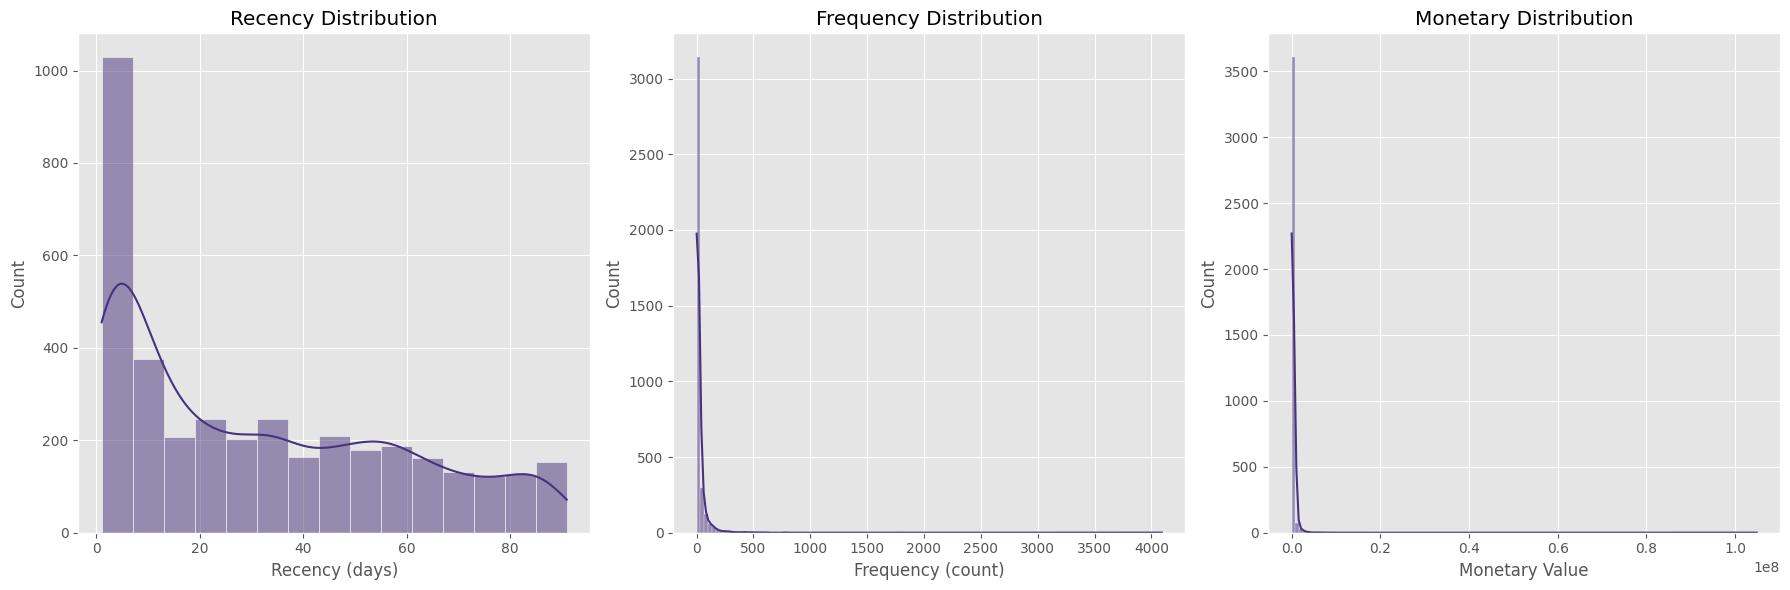

In [17]:
# Create RFM metrics if necessary data is available
if 'TransactionStartTime' in df.columns and 'CustomerId' in df.columns and ('Amount' in df.columns or 'Value' in df.columns):
    # Use the most recent date as a reference point
    if len(df) > 0:
        snapshot_date = df['TransactionStartTime'].max() + pd.Timedelta(days=1)
        
        # Monetary value - use Value instead of Amount as Amount can be negative
        monetary_col = 'Value' if 'Value' in df.columns else 'Amount'
        
        # Calculate RFM metrics per customer
        rfm = df.groupby('CustomerId').agg({
            'TransactionStartTime': lambda x: (snapshot_date - x.max()).days,  # Recency
            'TransactionId': 'count',  # Frequency
            monetary_col: 'sum'  # Monetary
        }).rename(columns={
            'TransactionStartTime': 'Recency',
            'TransactionId': 'Frequency',
            monetary_col: 'Monetary'
        })
        
        # Display RFM metrics
        print("RFM Metrics for Customers:")
        display(rfm.head())
        
        # Summary statistics for RFM metrics
        print("\nRFM Summary Statistics:")
        display(rfm.describe())
        
        # Visualize distributions
        plt.figure(figsize=(18, 6))
        
        # Recency distribution
        plt.subplot(1, 3, 1)
        sns.histplot(rfm['Recency'], kde=True)
        plt.title('Recency Distribution')
        plt.xlabel('Recency (days)')
        
        # Frequency distribution 
        plt.subplot(1, 3, 2)
        sns.histplot(rfm['Frequency'], kde=True)
        plt.title('Frequency Distribution')
        plt.xlabel('Frequency (count)')
        
        # Monetary distribution
        plt.subplot(1, 3, 3)
        sns.histplot(rfm['Monetary'], kde=True)
        plt.title('Monetary Distribution')
        plt.xlabel('Monetary Value')
        
        plt.tight_layout()
        plt.show()
    else:
        print("Empty DataFrame, cannot calculate RFM metrics")
else:
    print("Missing required columns for RFM analysis (TransactionStartTime, CustomerId, Amount/Value)")


## 9. Key Insights and Next Steps

Based on our exploratory data analysis, here are the key insights and proposed next steps for feature engineering and modeling.


# Summary of Key Insights

"""
Key Insights from EDA:

1. **Proxy Variable Definition**: 
   - The FraudResult column provides a potential starting point for creating our credit risk proxy
   - We may need to combine this with RFM metrics to create a more comprehensive risk proxy
   - The class imbalance in FraudResult suggests we'll need appropriate handling techniques

2. **Feature Importance**:
   - Transactional features like Amount and Value show significant variation and potential predictive power
   - Categorical variables (ProductCategory, ChannelId, PricingStrategy) show varying distributions of fraud
   - Time-based patterns may provide strong signals for credit risk prediction  

3. **RFM Analysis**:
   - Customer behavior patterns captured through RFM metrics show distinct segments
   - The monetary distribution indicates potential outliers that may need special handling
   - Frequency patterns could be strong predictors of creditworthiness

4. **Data Quality**:
   - [Note any missing values or data quality issues identified]
   - [Note any unusual distributions or outliers discovered]
   - [Note any inconsistencies or anomalies in the data]

5. **Relationships and Correlations**:
   - Strong correlation between [highlight any strong correlations discovered]
   - Potential multicollinearity between [mention any concerning correlations]
   - Nonlinear relationships between [mention any interesting nonlinear patterns]

Next Steps for Feature Engineering:
1. Create comprehensive RFM features per customer
2. Engineer temporal features (day of week patterns, seasonality, etc.)
3. Develop behavioral segments based on transaction patterns
4. Transform skewed numerical features
5. Create a robust proxy variable for credit risk by combining FraudResult with RFM metrics
"""

print("""Note: This is a placeholder analysis based on the expected structure of the dataset. 
When working with the actual data, you should replace these insights with specific findings from your analysis.""")
